In [1016]:
#import required libraries 
library(ggplot2)
library(plyr)
library(broom)
library(zoo)
library(forecast)
library(ggfortify)

In [1017]:
#Read CSV files into R
bookings = read.csv("bookings_data_data_analyst_test.csv")

In [1018]:
#Convert dates into date type
bookings$start_time <- as.Date(bookings$start_time, format= "%d/%m/%Y")
bookings$end_time <- as.Date(bookings$end_time, format= "%d/%m/%Y")

In [1019]:
#Remove whitespaces from Vehicle model and Vehicle make names.
bookings$vehicle_model <- gsub(" ", "", bookings$vehicle_model, fixed = TRUE)
bookings$vehicle_make <- gsub(" ", "", bookings$vehicle_make, fixed = TRUE)

In [1020]:
# Find rows of data with missing values - Only vehicle model/make is missing - can still use other data
new_DF <- bookings[rowSums(is.na(bookings)) > 0,]
new_DF

,start_time,end_time,vehicle_id,vehicle_model,vehicle_make,weekly_gmv,weekly_commission
1926,2018-04-16,2018-10-01,1926,NA,NA,201,41


In [1021]:
# Thte total number of live bookings on the 12th January 2018 
date = "2018/01/12"
live_bookings <- subset(bookings, subset = (date >=start_time & date <= end_time))
print(paste("The number of live bookings on the 12th January 2018:",nrow(live_bookings)))

[1] "The number of live bookings on the 12th January 2018: 462"


In [1022]:
# Find the total duration in weeks for each booking and create new column "no_weeks"
bookings <- transform(bookings, no_weeks = as.numeric(difftime(bookings$end_time, bookings$start_time, units = "weeks")))

In [1023]:
#Create column entitled "total_commission" to find the highest commission rate as a percentage of gmv 
bookings <- transform(bookings, total_commission = (weekly_commission / weekly_gmv)*no_weeks)

In [1024]:
# Find highest commission rate as a percentage of GMV
subset(bookings, subset = total_commission == max(bookings$total_commission))

,start_time,end_time,vehicle_id,vehicle_model,vehicle_make,weekly_gmv,weekly_commission,no_weeks,total_commission
441,2018-02-28,2019-02-27,441,Galaxy,Ford,227,67,52,15.34802


In [1025]:
# Format start year and end year columns to create new columns with respective years only
bookings <- transform(bookings, start_year = as.numeric(format(start_time,'%Y')))
bookings <- transform(bookings, end_year = as.numeric(format(end_time,'%Y')))

# Format start year and end year columns to create new columns with respective years only
bookings <- transform(bookings, start_month = format(start_time,'%b'))
bookings <- transform(bookings, end_month = format(end_time,'%b'))

# lock in factor level order
bookings$start_month <- factor(bookings$start_month, month.abb, ordered=TRUE)
bookings[order(bookings$start_month), ]

,start_time,end_time,vehicle_id,vehicle_model,vehicle_make,weekly_gmv,weekly_commission,no_weeks,total_commission,start_year,end_year,start_month,end_month
5,2018-01-02,2018-01-09,5,IoniqHybrid,Hyundai,209,49,1.0000000,0.23444976,2018,2018,Jan,Jan
6,2017-01-06,2017-01-12,6,Prius,Toyota,212,52,0.8571429,0.21024259,2017,2017,Jan,Jan
10,2018-01-10,2018-01-16,10,Prius,Toyota,216,56,0.8571429,0.22222222,2018,2018,Jan,Jan
19,2018-01-30,2018-02-13,19,Auris,Toyota,213,53,2.0000000,0.49765258,2018,2018,Jan,Feb
30,2017-01-18,2017-04-13,30,Prius,Toyota,213,53,12.1428571,3.02146211,2017,2017,Jan,Apr
34,2018-01-15,2018-04-10,34,Octavia,Skoda,210,50,12.1428571,2.89115646,2018,2018,Jan,Apr
42,2017-01-05,2017-02-02,42,Superb,Skoda,202,42,4.0000000,0.83168317,2017,2017,Jan,Feb
60,2018-01-18,2018-01-29,60,Prius,Toyota,229,69,1.5714286,0.47348721,2018,2018,Jan,Jan
62,2018-01-26,2018-04-23,62,PriusNewShape,Toyota,223,63,12.4285714,3.51121076,2018,2018,Jan,Apr
71,2018-01-03,2018-03-23,71,PriusNewShape,Toyota,223,63,11.2857143,3.18834081,2018,2018,Jan,Mar


In [1026]:
# Find Toyota Prius' that were on hire at any point during 2017 i.e. either start year or end year = 2017
Prius <- subset(bookings, vehicle_model == "Prius" & vehicle_make == "Toyota" & (start_year == 2017 | end_year == 2017))
print(paste("The number of Toyota Prius' that were hired at some point during 2017:",nrow(Prius), "vehicles."))

[1] "The number of Toyota Prius' that were hired at some point during 2017: 1630 vehicles."


In [1095]:
#Convert dates into 1st month date type for frequency calculations
bookings$date  <- as.Date(cut(bookings$start_time,breaks = "month"))

In [1028]:
#Remove NA Value - Vehicle Name/Vehicle Model is missing, hence only one datapoint for this row. This datapoint contributes towards
#the correlation analysis but not to trend observations between different vehicle makes and models.
bookings <- na.omit(bookings)

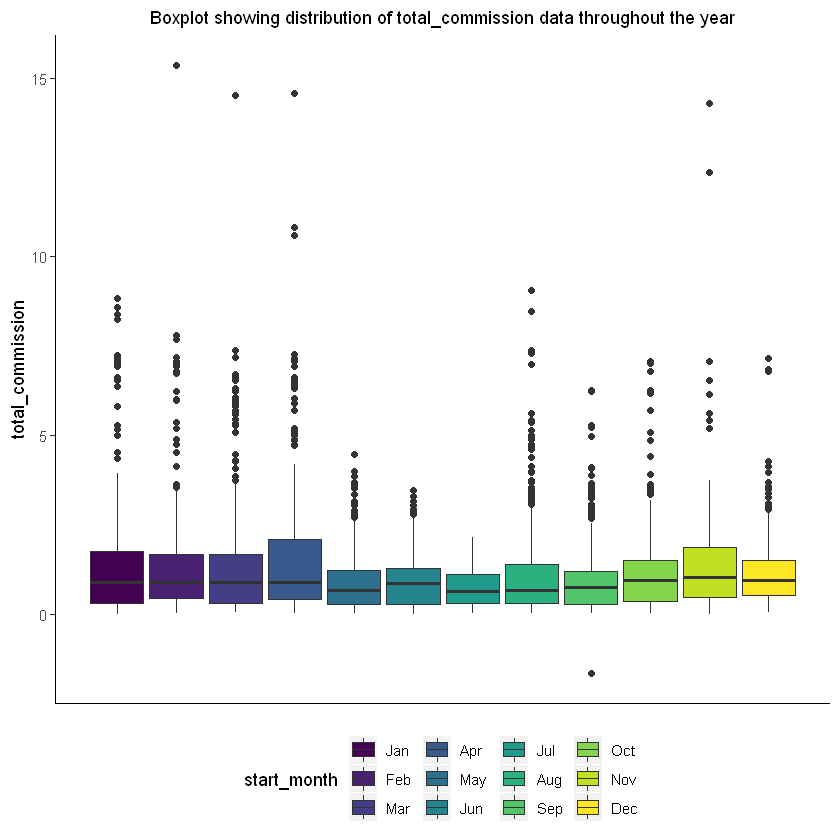

In [1029]:
# Use the Boxplot function to see any seasonal effects - seems as though bookings are highest from September to April. During
#these months, the highest variances and median values are observed. 
#High numbers of outliers are seen on a monthly basis. Given only a years worth of data, cannot be entirely certain whether
# these datapoints are truly outliers. 
p <- ggplot(bookings, aes(group=start_month, y=total_commission,fill=start_month)) + geom_boxplot()
p + theme(plot.title = element_text(color="black", size=11, hjust=0.5),panel.grid.major = element_blank(), 
         panel.grid.minor = element_blank(),
         panel.background = element_blank(),
         axis.text.x=element_blank(),
         axis.line = element_line(colour = "black"),
          legend.position="bottom",
         axis.ticks.x=element_blank())  + ggtitle("Boxplot showing distribution of total_commission data throughout the year")  

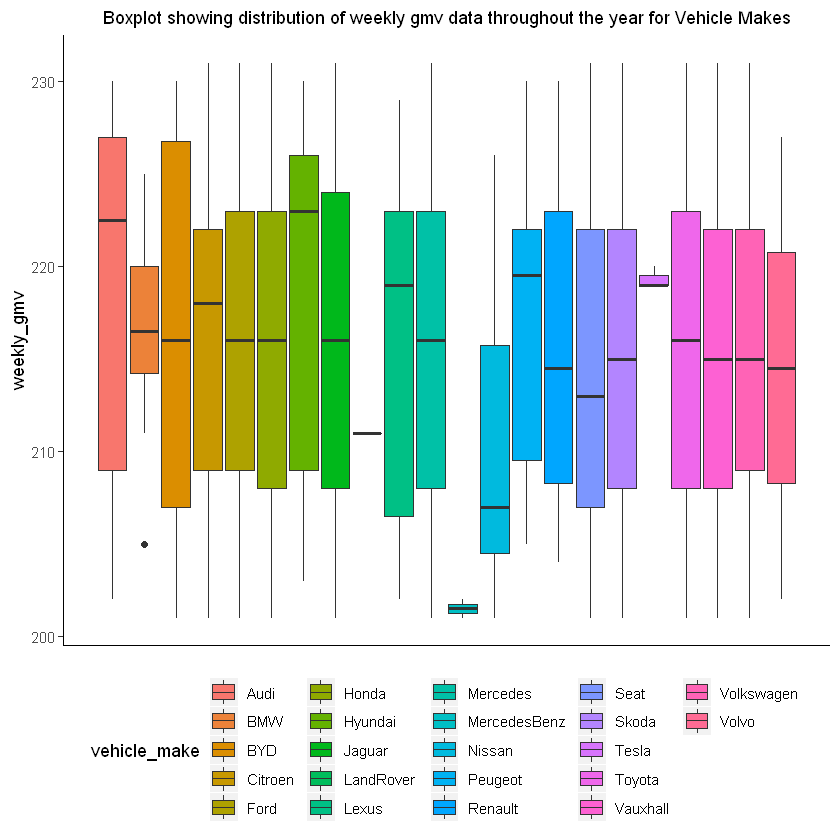

In [1030]:
#Boxplot showing distribution of weekly gmv data for different vehicle makes 
p <- ggplot(bookings, aes(group=vehicle_make, y=weekly_gmv,fill=vehicle_make)) + geom_boxplot()
p + theme(plot.title = element_text(color="black", size=11, hjust=0.5),panel.grid.major = element_blank(), 
         panel.grid.minor = element_blank(),
         panel.background = element_blank(),
         axis.text.x=element_blank(),
         axis.line = element_line(colour = "black"),
          legend.position="bottom",
         axis.ticks.x=element_blank())  + ggtitle("Boxplot showing distribution of weekly gmv data throughout the year for Vehicle Makes")  

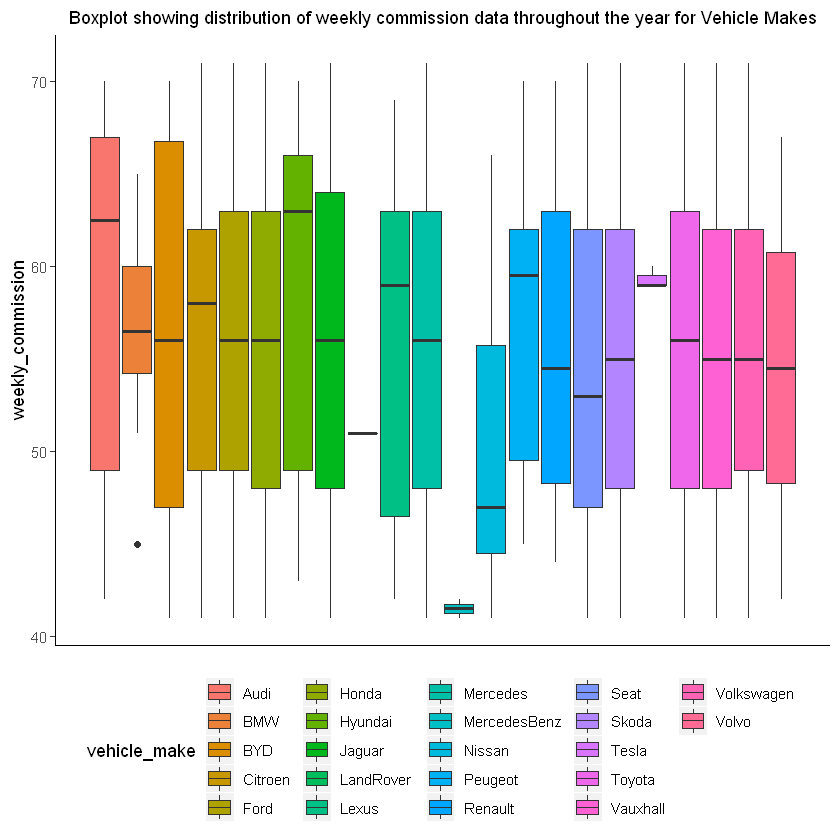

In [1031]:
#Boxplot showing distribution of weekly commission data for different vehicle makes. Similar results as the weekly gmv boxplots
p <- ggplot(bookings, aes(group=vehicle_make, y=weekly_commission,fill=vehicle_make)) + geom_boxplot()
p + theme(plot.title = element_text(color="black", size=11, hjust=0.5),panel.grid.major = element_blank(), 
         panel.grid.minor = element_blank(),
         panel.background = element_blank(),
         axis.text.x=element_blank(),
         axis.line = element_line(colour = "black"),
         legend.position="bottom",
         axis.ticks.x=element_blank())  + ggtitle("Boxplot showing distribution of weekly commission data throughout the year for Vehicle Makes")  

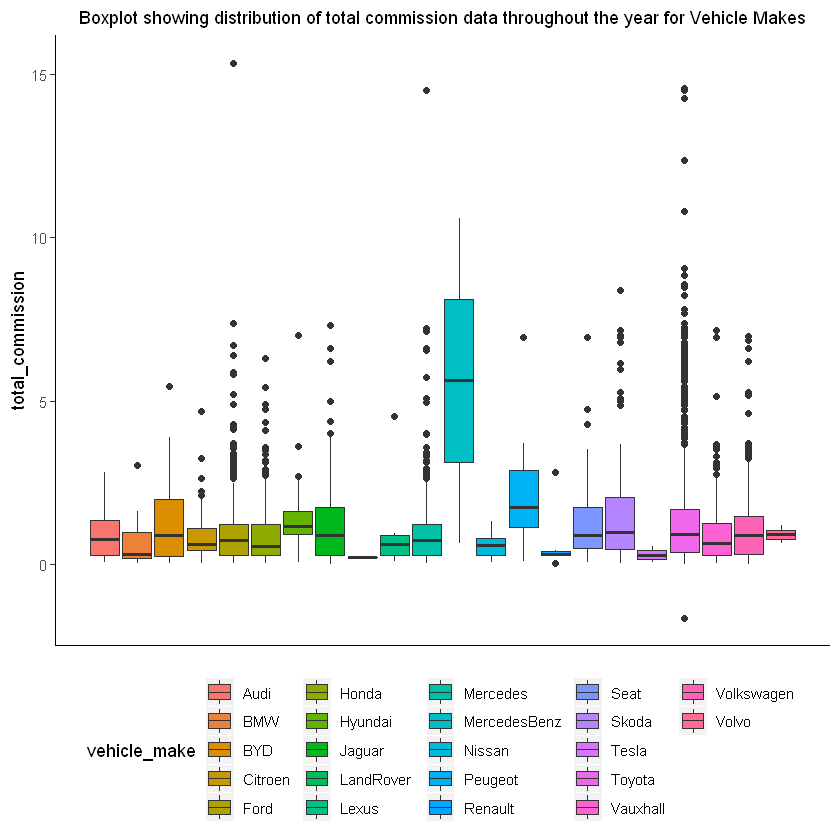

In [1032]:
#Boxplot showing distribution of total commission data for different vehicle makes 
p <- ggplot(bookings, aes(group=vehicle_make, y=total_commission,fill=vehicle_make)) + geom_boxplot()
p + theme(plot.title = element_text(color="black", size=11, hjust=0.5),panel.grid.major = element_blank(), 
         panel.grid.minor = element_blank(),
         panel.background = element_blank(),
         axis.text.x=element_blank(),
         axis.line = element_line(colour = "black"),
         legend.position="bottom",
         axis.ticks.x=element_blank())  + ggtitle("Boxplot showing distribution of total commission data throughout the year for Vehicle Makes")  

In [1033]:
#Assume that this booking is an error - there are no other future bookings in the dataset - remove
#datapoint as it will affect the correlation analysis significantly.
subset(bookings, subset = start_time == max(bookings$start_time))

,start_time,end_time,vehicle_id,vehicle_model,vehicle_make,weekly_gmv,weekly_commission,no_weeks,total_commission,start_year,end_year,start_month,end_month,date
4633,2019-01-14,2019-04-09,4633,Auris,Toyota,209,49,12.14286,2.84689,2019,2019,Jan,Apr,2019-01-01


In [1034]:
# Remove outlier data point and observe total commission per day
bookings<-bookings[!(bookings$start_time=="2019-01-14"),]

In [1035]:
# Groupby dataset using total_commission calculated previously 
df <- ddply(bookings,.(start_time),summarize,total_commission = sum(total_commission))

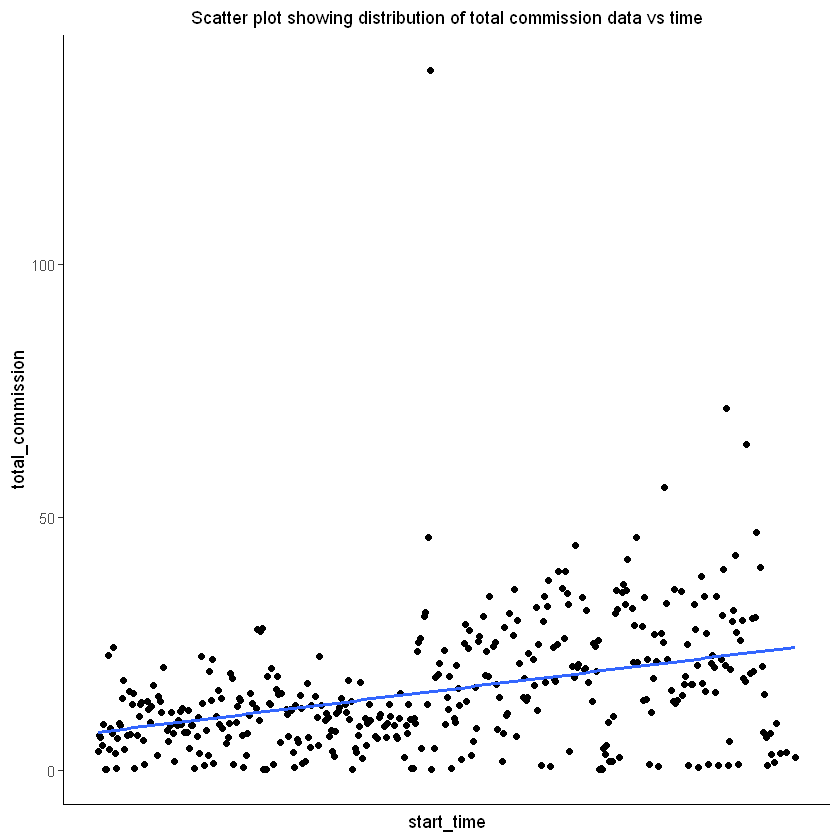

In [1036]:
# Scatterplot with regression line for start time vs total commission 
p <- ggplot(data = df, aes(x = start_time, y = total_commission)) + geom_point() + geom_smooth(method = "lm", se = FALSE)
p + theme(plot.title = element_text(color="black", size=11, hjust=0.5),panel.grid.major = element_blank(), 
         panel.grid.minor = element_blank(),
         panel.background = element_blank(),
         axis.text.x=element_blank(),
         axis.line = element_line(colour = "black"),
         legend.position="bottom",
         axis.ticks.x=element_blank())  + ggtitle("Scatter plot showing distribution of total commission data vs time") 

In [1037]:
# Find highest total commission datapoint - could be an outlier
subset(df, subset = total_commission == max(df$total_commission))

,start_time,total_commission
196,2017-08-25,138.3952


In [1038]:
# 90 bookings observed during this day 
count(subset(bookings, subset = start_time == "2017/08/25"))

n
90


In [1039]:
# Sum up total commission in every month to carry out forecasting analysis. 
df <- ddply(bookings,.(date),summarize,total_commission = sum(total_commission))

In [1040]:
data <- df[df$total_commission == max(df$total_commission),]

In [1041]:
# Same day where high value of weekly gmv was observed
data <- bookings[bookings$date == "2017-08-25",]

In [1042]:
# Create timeseries object for forecasting model
all_dates = seq(as.Date(as.yearmon(min(df$date))), as.Date(as.yearmon(max(df$date))), by="month")
df_clean = merge(data.frame(date = all_dates),
                            df,
                            by.x='date',
                            by.y='date',
                            all.x=T,
                            all.y=T)
df_clean$total_commission[is.na(df_clean$total_commission)] = 0
timeSeriesObj = ts(df_clean$total_commission,start=c(2017,1,1),frequency=12)

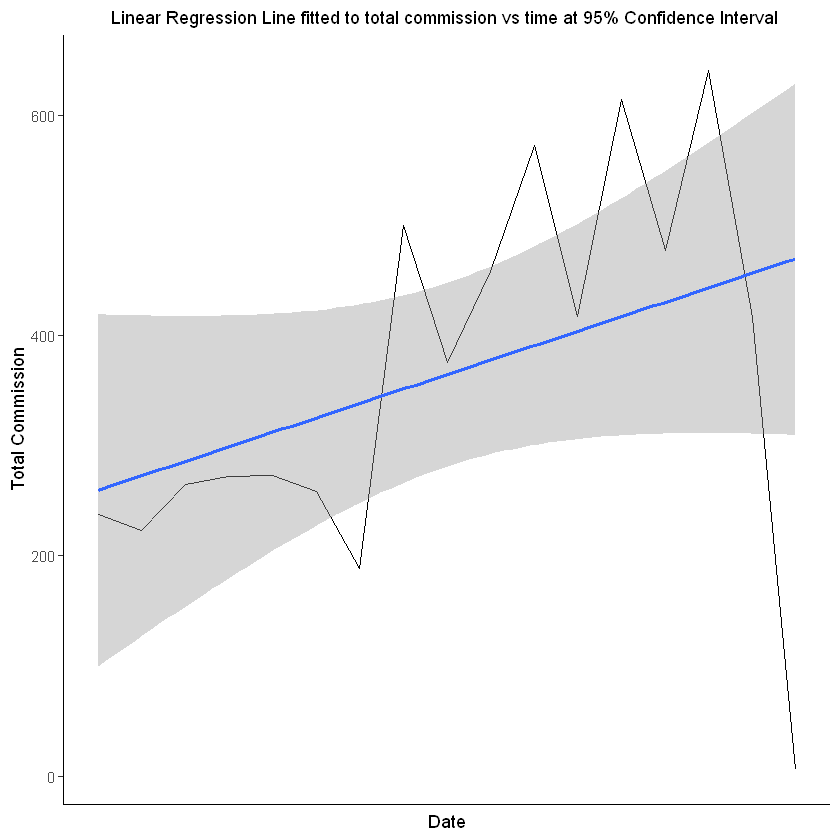

In [1043]:
#Plot the time series data. Seems odd to see such a dramatic drop. 
p <- autoplot(timeSeriesObj) + geom_smooth(method="lm")+ labs(x ="Date", y = "Total Commission")

p + theme(plot.title = element_text(color="black", size=11, hjust=0.5),panel.grid.major = element_blank(), 
         panel.grid.minor = element_blank(),
         panel.background = element_blank(),
         axis.text.x=element_blank(),
         axis.line = element_line(colour = "black"),
         legend.position="bottom",
         axis.ticks.x=element_blank())  + ggtitle("Linear Regression Line fitted to total commission vs time at 95% Confidence Interval ") 

In [1044]:
#Only two bookings observed during this month hence drop in total_commission
bookings[bookings$date == "2018-05-01",]

,start_time,end_time,vehicle_id,vehicle_model,vehicle_make,weekly_gmv,weekly_commission,no_weeks,total_commission,start_year,end_year,start_month,end_month,date
664,2018-05-04,2018-07-27,664,AurisEstate,Toyota,227,67,12,3.541850,2018,2018,May,Jul,2018-05-01
3375,2018-05-11,2018-08-03,3375,AurisEstate,Toyota,203,43,12,2.541872,2018,2018,May,Aug,2018-05-01


In [1045]:
all_dates = seq(as.Date(as.yearmon(min(df$date))), as.Date(as.yearmon(max(df$date))), by="month")
df_clean = merge(data.frame(date = all_dates),
                            df,
                            by.x='date',
                            by.y='date',
                            all.x=T,
                            all.y=T)
df_clean$total_commission[is.na(df_clean$total_commission)] = 0
df_clean<-df_clean[!(df_clean$date=="2018-05-01"),]
timeSeriesObj = ts(df_clean$total_commission,start=c(2017,1,1),frequency=12)

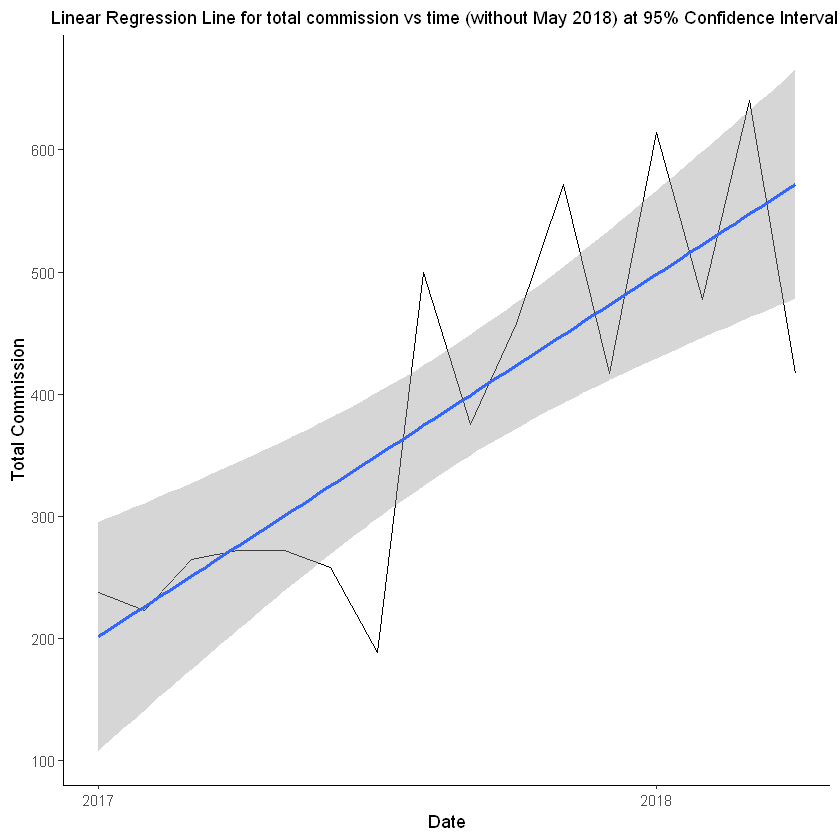

In [1046]:
p <- autoplot(timeSeriesObj) + geom_smooth(method="lm")+ labs(x ="Date", y = "Total Commission")

p + theme(plot.title = element_text(color="black", size=11, hjust=0.5),panel.grid.major = element_blank(), 
         panel.grid.minor = element_blank(),
         panel.background = element_blank(),
         axis.line = element_line(colour = "black"),
         legend.position="bottom")  + ggtitle("Linear Regression Line for total commission vs time (without May 2018) at 95% Confidence Interval ")

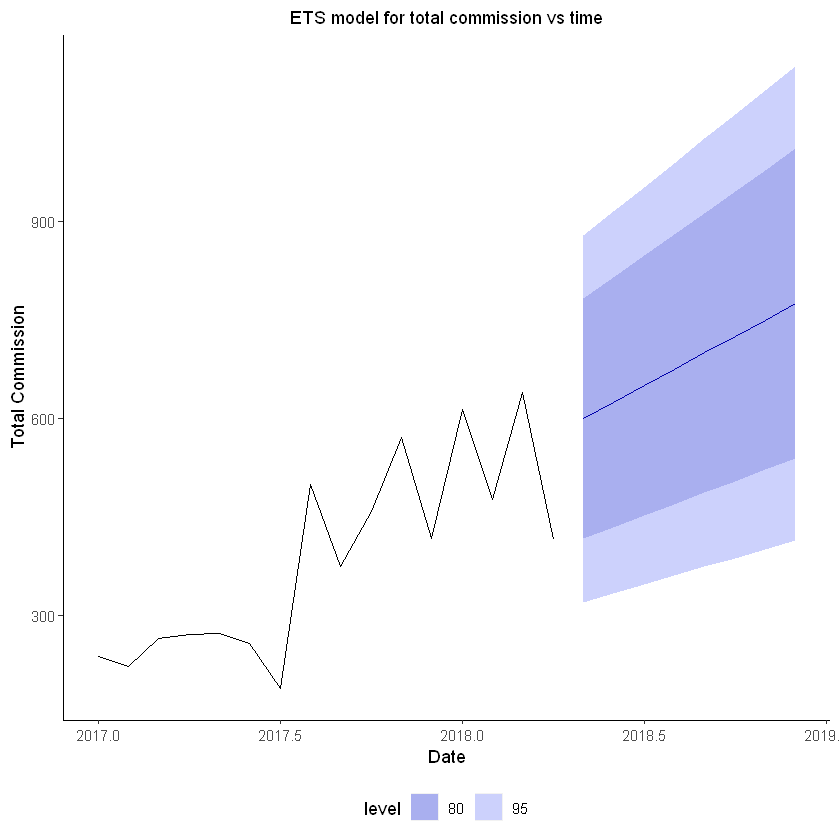

In [1047]:
m_ets <- ets(timeSeriesObj)
f_ets <- forecast(m_ets, h=8)
p <- autoplot(f_ets) + labs(x ="Date", y = "Total Commission")
p + theme(plot.title = element_text(color="black", size=11, hjust=0.5),panel.grid.major = element_blank(), 
         panel.grid.minor = element_blank(),
         panel.background = element_blank(),
         axis.line = element_line(colour = "black"),
         legend.position="bottom")  + ggtitle("ETS model for total commission vs time")

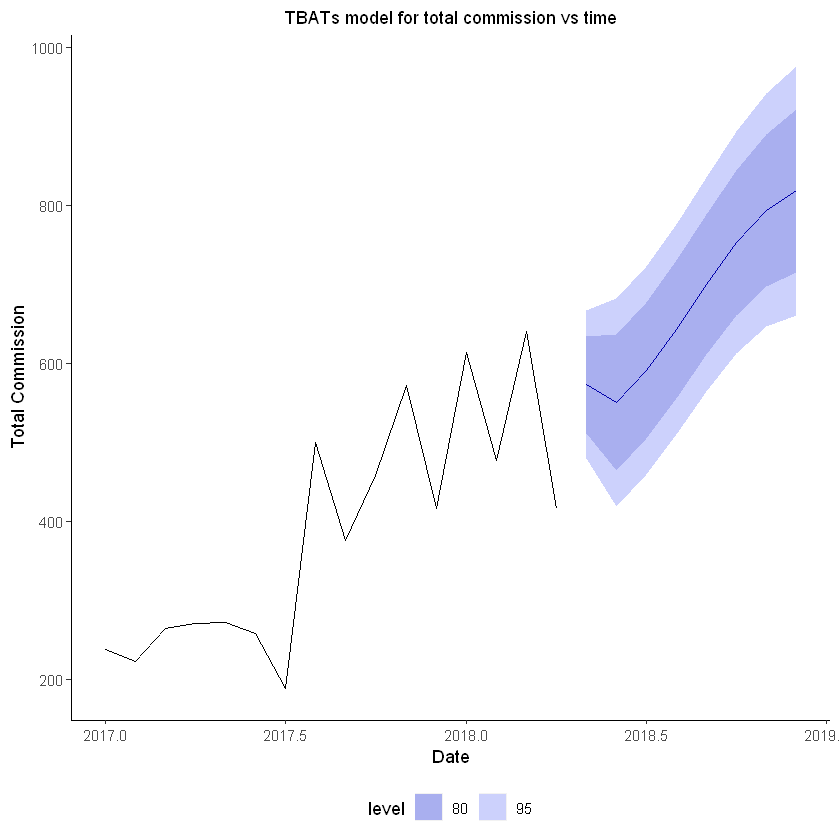

In [1048]:
#TBATS seems to fit the data better but that does not necesarilly mean that the model will outperform ETS in practice
m_tbats <- tbats(timeSeriesObj)
f_tbats <- forecast(m_tbats, h=8)
p <- autoplot(f_tbats) + labs(x ="Date", y = "Total Commission") 
p + theme(plot.title = element_text(color="black", size=11, hjust=0.5),panel.grid.major = element_blank(), 
         panel.grid.minor = element_blank(),
         panel.background = element_blank(),
         axis.line = element_line(colour = "black"),
         legend.position="bottom")  + ggtitle("TBATs model for total commission vs time")


	Ljung-Box test

data:  Residuals from ETS(M,A,N)
Q* = 9.7657, df = 3, p-value = 0.02067

Model df: 4.   Total lags used: 7



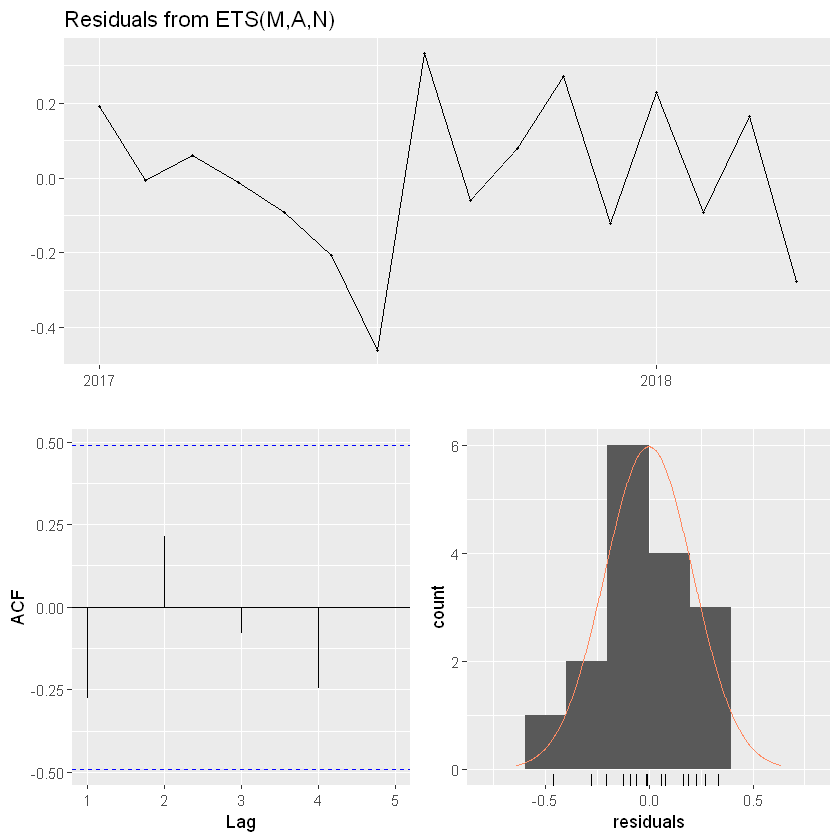

In [1049]:
# Residuals more normally distributed around 0. Residuals limit [~0.45,0.35]
checkresiduals(m_ets)


	Ljung-Box test

data:  Residuals from TBATS
Q* = 13.223, df = 3, p-value = 0.004179

Model df: 10.   Total lags used: 13



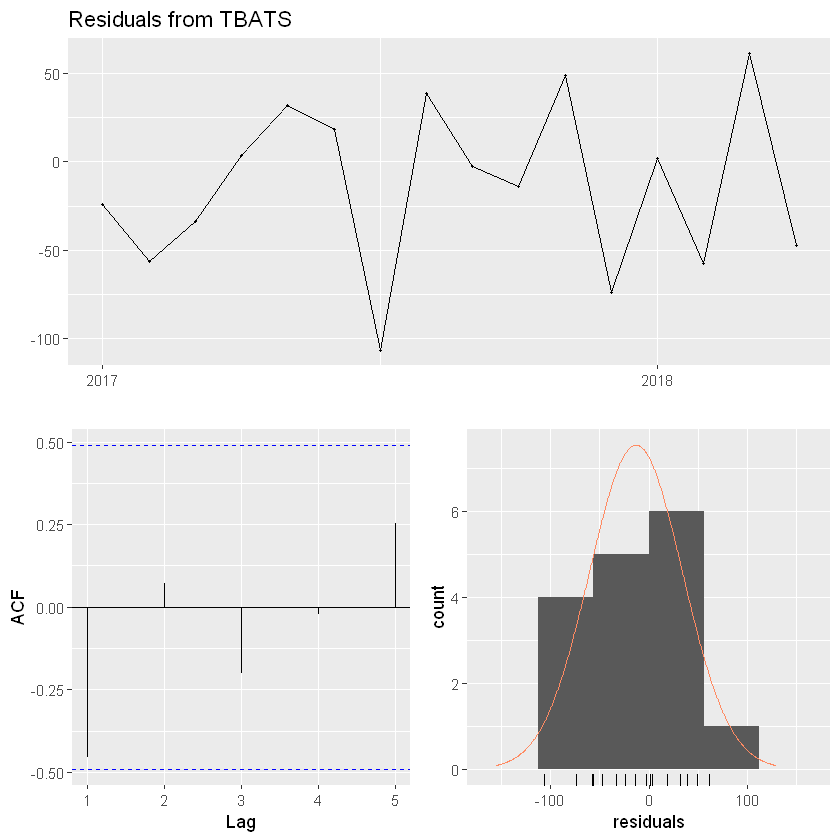

In [1050]:
# Slight positive skew observed with tbats residuals. Limits/fluctuations of residuals far greater in TBATs model 
# vs ETS model [~115,75]
checkresiduals(m_tbats)

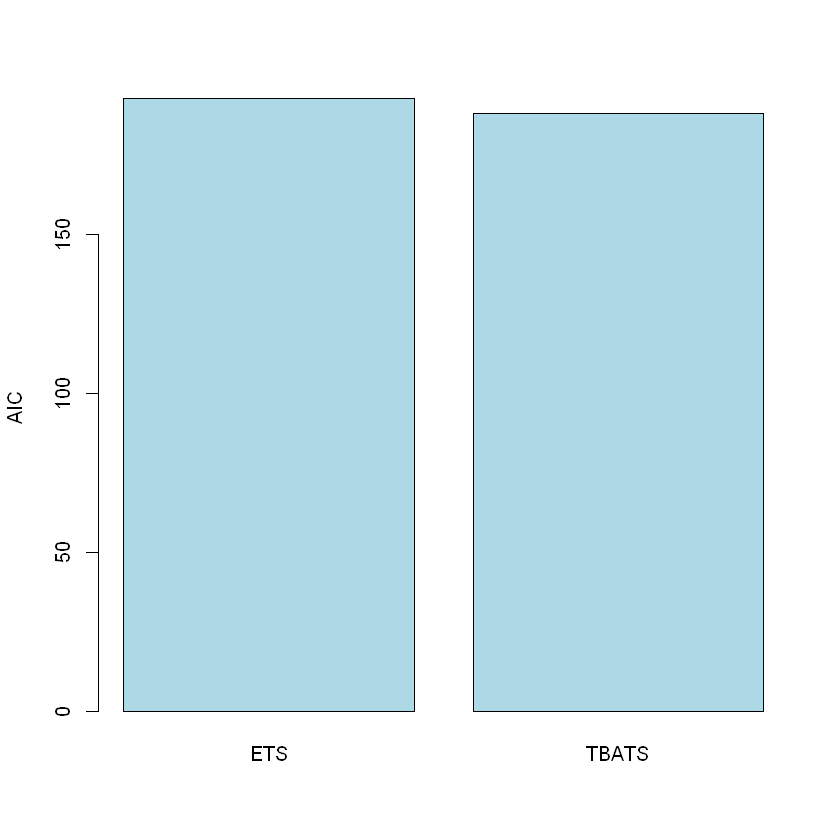

In [1051]:
# AIC values of both models though, AIC is not a consistent model selection method. It cannot be used to compare different types
# of forecasting models 

barplot(c(ETS=m_ets$aic, TBATS=m_tbats$AIC), 
       col="light blue",
       ylab="AIC")

In [1052]:
# Use time series cross validation for tbats model to enable comparison with ets
f  <- function(y, h) forecast(tbats(y), h = h)
e <- tsCV(timeSeriesObj, f, h=8)

In [1053]:
cv <- sqrt(mean(e^2, na.rm=TRUE))
mod <- sqrt(mean(residuals(f_tbats)^2, na.rm=TRUE))
print(paste("Cross Validation Error:",signif(cv,3),", Without Cross Validation:",signif(mod,3),sep=""))

[1] "Cross Validation Error:720, Without Cross Validation:47.8"


In [1054]:
# Create function to carry out time series cross valdiation for ets model
f  <- function(y, h) forecast(ets(y), h = h)
e <- tsCV(timeSeriesObj, f, h=8)

In [1055]:
# Cross Validation RMSE is much higher than "Without CV" model. Expected as "Without CV" model is trained on the entire dataset. 
# CV RMSE is much higher for tbats model vs ets model hence, higher probability of being able to generalise to new data i.e work in practice

cv <- sqrt(mean(e^2, na.rm=TRUE))
mod <- sqrt(mean(residuals(f_ets)^2, na.rm=TRUE))
print(paste("Cross Validation Error:",signif(cv,3),", Without Cross Validation:",signif(mod,3),sep=""))

[1] "Cross Validation Error:188, Without Cross Validation:0.206"


In [1056]:
start_2018 <- subset(df_clean, subset = date == "2018/01/01")$total_commission

In [1057]:
growth_ <- (as.numeric(f_tbats$mean)[8] - start_2018)*100/start_2018
upper_ <- (as.numeric(f_tbats$upper[8,2]) - start_2018)*100/start_2018
lower_ <- (as.numeric(f_tbats$lower[8,2]) - start_2018)*100/start_2018
print(paste("Expected Percentage Growth in 2018(TBATS):", signif(growth_,3),"%", " (Upper: ",signif(upper_,3),"% - Lower:",signif(lower_,3),"%) - 95% confidence",sep=""))

[1] "Expected Percentage Growth in 2018(TBATS):33.2% (Upper: 58.8% - Lower:7.62%) - 95% confidence"


In [1058]:
# ETS model is less conservative in terms of range of values predicted for percentage growth in 2018. Howver, the mean expected
# percentage growth of 26.2% is lower than 33.2% obtained by the TBATS model. Howver, both mean values are fairly close in magnitude. 
growth <- (as.numeric(f_ets$mean)[8] - start_2018)*100/start_2018
upper <- (as.numeric(f_ets$upper[8,2]) - start_2018)*100/start_2018
lower <- (as.numeric(f_ets$lower[8,2]) - start_2018)*100/start_2018
print(paste("Expected Percentage Growth in 2018(ETS):", signif(growth,3),"%", " (Upper: ",signif(upper,3),"% - Lower:",signif(lower,3),"%) - 95% confidence",sep=""))

[1] "Expected Percentage Growth in 2018(ETS):26.2% (Upper: 84.9% - Lower:-32.6%) - 95% confidence"


In [1059]:
# Combining both models may be an optimum solution in forecasting growth. The combined means is similar to the means obtained for the 
# individual models as expexted. Combining the TBATs model with the ETS model, brings a more consersative outlook in comparison to 
# the ets model alone. However, the upper and lower limits are still extreme at 71.8% and -12.5% respectively. 
growth_com <- (growth_+growth)/2
upper_com <- (upper_+upper)/2
lower_com <- (lower+lower_)/2
print(paste("Expected Percentage Growth in 2018(Combo):", signif(growth_com,3),"%", " (Upper: ",signif(upper_com,3),"% - Lower:",signif(lower_com,3),"%) - 95% confidence",sep=""))

[1] "Expected Percentage Growth in 2018(Combo):29.7% (Upper: 71.8% - Lower:-12.5%) - 95% confidence"


In [1060]:
## Vehicle Models we can expect to be in bookings the most/longest

#Convert dates into 1st month date type for frequency calculations
bookings<-bookings[!(bookings$date=="2018-05-01"),]
bookings$date  <- as.Date(cut(bookings$start_time,breaks = "month"))

In [1061]:
library(dplyr)

In [1062]:
#Group data by date, vehicle model and make and find frequency
df2 <- ddply(bookings,.(date,vehicle_model,vehicle_make),summarize,Frequency = n())

In [1063]:
#Table clearly shows that Toyota Prius tops the leaderboard in terms of highest number of bookings per month 
df2[order(-df2$Frequency),] 

,date,vehicle_model,vehicle_make,Frequency
324,2017-11-01,Prius,Toyota,197
220,2017-08-01,Prius,Toyota,179
287,2017-10-01,Prius,Toyota,159
397,2018-01-01,Prius,Toyota,148
253,2017-09-01,Prius,Toyota,141
431,2018-02-01,Prius,Toyota,135
360,2017-12-01,Prius,Toyota,133
462,2018-03-01,Prius,Toyota,133
131,2017-05-01,Prius,Toyota,131
69,2017-03-01,Prius,Toyota,129


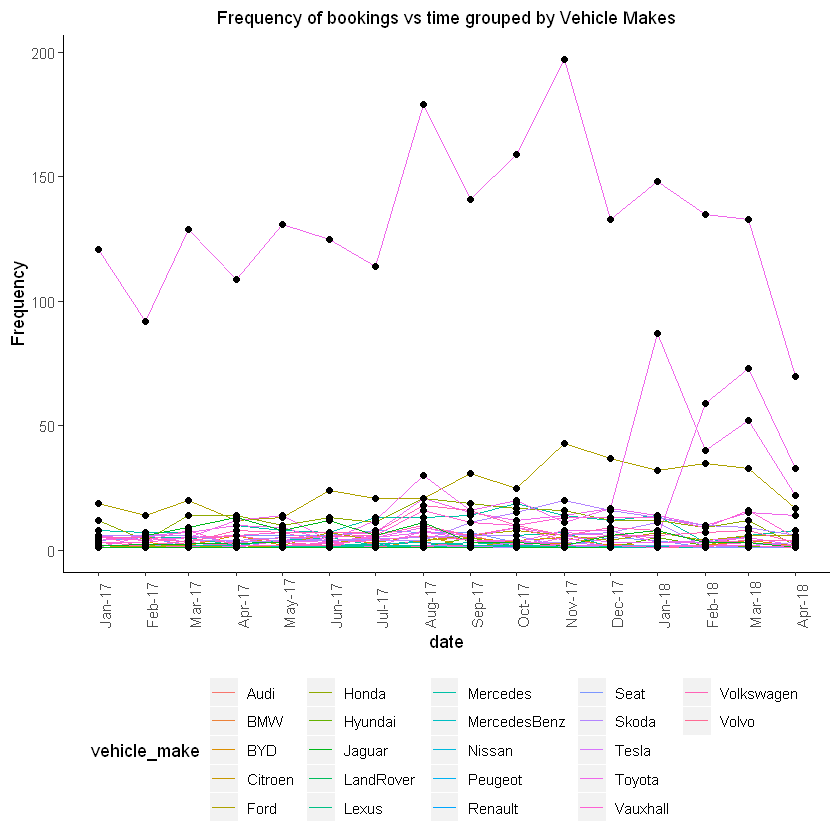

In [1064]:
# Line plot with most frequently booked groups on average - Toyota Prius by far the most frequently used vehicle.
# However, it seems as though the frequency of prius usage is decreasing from the fourth quarter of 2017 onwards. 

p <- ggplot(data=df2, aes(x=date, y=Frequency, group=vehicle_model)) +
  geom_line(aes(color=vehicle_make))+
  geom_point() + scale_x_date(date_breaks = "months" , date_labels = "%b-%y")
p + theme(plot.title = element_text(color="black", size=11, hjust=0.5),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.background = element_blank(), 
          axis.line = element_line(colour = "black"), 
          legend.position="bottom", 
          axis.text.x = element_text(angle = 90, hjust = 0),) + ggtitle("Frequency of bookings vs time grouped by Vehicle Makes")
          

In [1065]:
#Observe overall median frequency for each vehicle type - Toyota Prius still leading with the use of median values, less 
#susceptible to outliers 
df3 <- ddply(df2,.(vehicle_model,vehicle_make),summarize,Avg_Frequency = median(Frequency))

In [1066]:
df3[order(-df3$Avg_Frequency),] 

,vehicle_model,vehicle_make,Avg_Frequency
43,Prius,Toyota,132.0
24,Galaxy,Ford,22.5
45,PriusNewShape,Toyota,15.0
10,Auris,Toyota,13.0
29,Insight,Honda,12.0
21,EClass,Mercedes,9.0
30,Insignia,Vauxhall,8.0
56,Sharan,Volkswagen,7.0
11,AurisEstate,Toyota,6.0
66,XfSeries,Jaguar,6.0


In [1067]:
#Limit data to top 5 vehicles in order to visualise trends over time 
data <- df2[df2$vehicle_model == 'Prius'|df2$vehicle_model == 'Galaxy'|df2$vehicle_model == 'Prius New Shape'|df2$vehicle_model == 'Auris'| df2$vehicle_model == 'Insight'| df2$vehicle_model == 'EClass',]

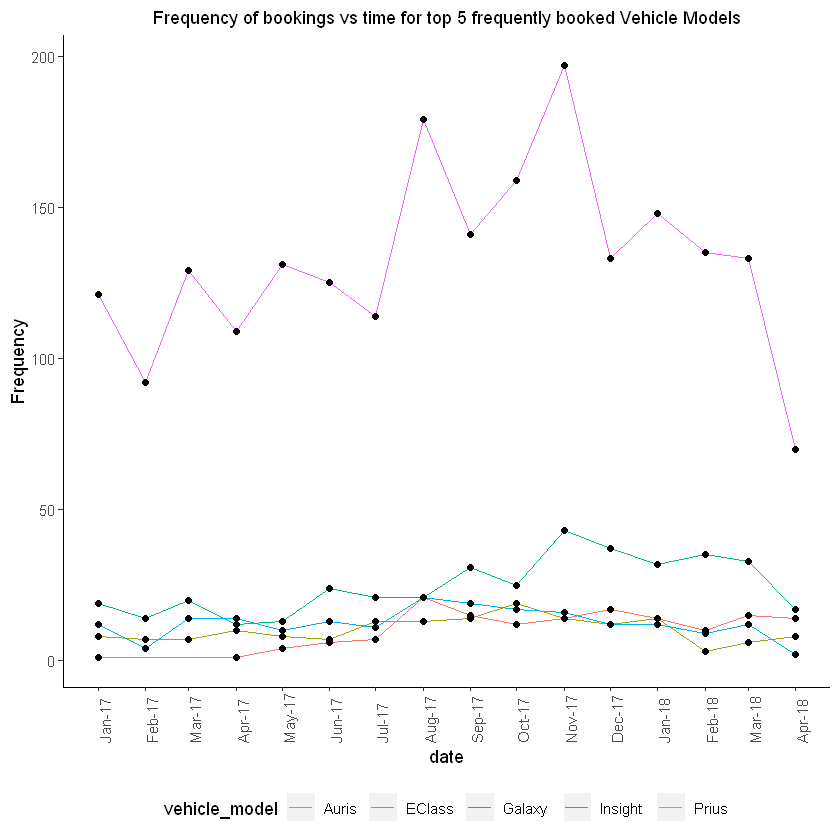

In [1068]:
# Line plot with most frequently booked groups on average - Toyota Prius by far the most frequently used vehicle.
# However, it seems as though the frequency of prius usage is decreasing from the fourth quarter of 2017 onwards. 
p <- ggplot(data=data, aes(x=date, y=Frequency, group=vehicle_model)) +
  geom_line(aes(color=vehicle_model))+
  geom_point() + scale_x_date(date_breaks = "months" , date_labels = "%b-%y")
p + theme(plot.title = element_text(color="black", size=11,hjust=0.5),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.background = element_blank(), 
          axis.line = element_line(colour = "black"), 
          legend.position="bottom", 
          axis.text.x = element_text(angle = 90, hjust = 0),) + ggtitle("Frequency of bookings vs time for top 5 frequently booked Vehicle Models")

In [1069]:
#Subset data only concerning Toyota
data <- df2[df2$vehicle_make == "Toyota",]

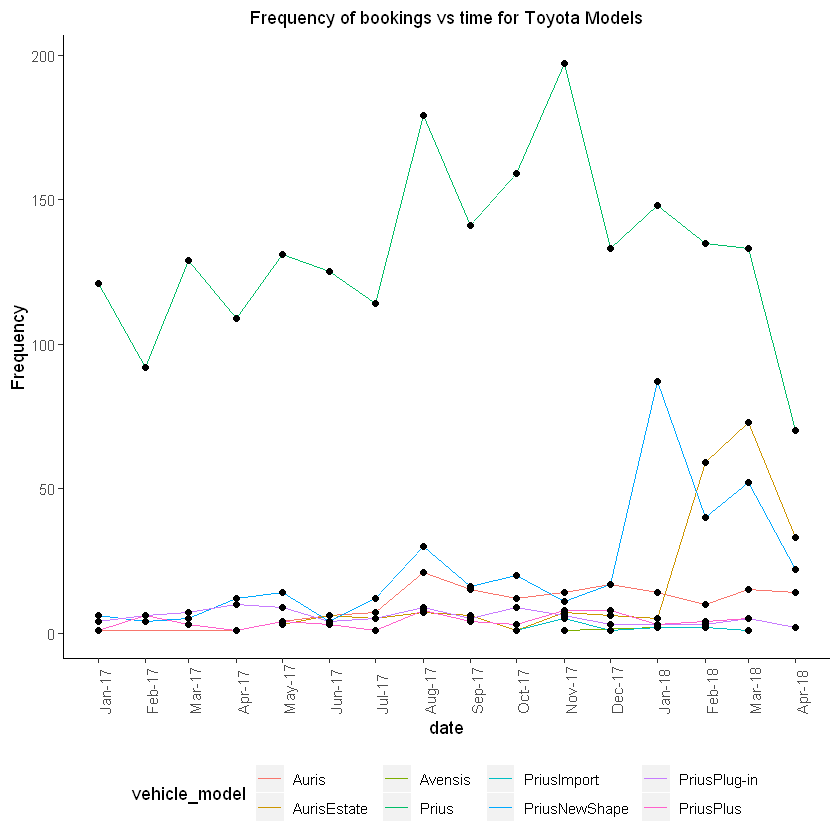

In [1070]:
# Graph showing trends within the Toyota models over time. Decrease in Toyota Prius maybe due to customers choosing to opt for
# the prius new shape and auris estate instead. Is there a reason behind this increase - a deal/promotion offer? Shortly after peak, 
# a significant decrease is observed for all models especially the top 3 - Prius, Prius New Shape and Auris - however, frequency of Prius
# is still double the next highest model - Prius New Shape from March 2018 onwards. 

p <- ggplot(data=data, aes(x=date, y=Frequency, group=vehicle_model)) +
  geom_line(aes(color=vehicle_model))+
  geom_point() + scale_x_date(date_breaks = "months" , date_labels = "%b-%y")
p + theme(plot.title = element_text(color="black", size=11,hjust=0.5),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.background = element_blank(), 
          axis.line = element_line(colour = "black"), 
          legend.position="bottom", 
          axis.text.x = element_text(angle = 90, hjust = 0),) + ggtitle("Frequency of bookings vs time for Toyota Models")

In [1071]:
#Group data by date and vehicle make and find frequency
df4 <- ddply(bookings,.(date,vehicle_make),summarize,Frequency = n())

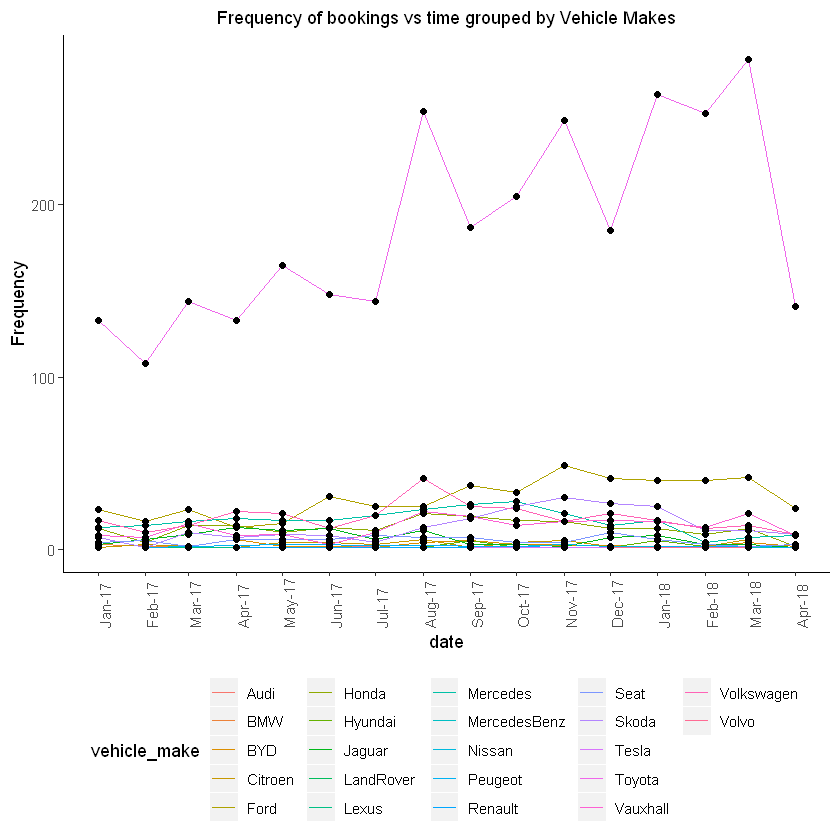

In [1072]:
# Line plot with most frequently booked groups on average - Toyota Prius by far the most frequently used vehicle.
# However, it seems as though the frequency of prius usage is decreasing from the fourth quarter of 2017 onwards. 
p <- ggplot(data=df4, aes(x=date, y=Frequency, group=vehicle_make)) +
  geom_line(aes(color=vehicle_make))+
  geom_point() + scale_x_date(date_breaks = "months" , date_labels = "%b-%y")
p + theme(plot.title = element_text(color="black", size=11, hjust=0.5),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.background = element_blank(), 
          axis.line = element_line(colour = "black"), 
          legend.position="bottom", 
          axis.text.x = element_text(angle = 90, hjust = 0),) + ggtitle("Frequency of bookings vs time grouped by Vehicle Makes")
          

In [1073]:
# For record no. 2629, the end_time < start_time - probably an error in the data.
bookings[order(bookings$no_weeks),] 

,start_time,end_time,vehicle_id,vehicle_model,vehicle_make,weekly_gmv,weekly_commission,no_weeks,total_commission,start_year,end_year,start_month,end_month,date
2629,2017-09-27,2017-08-08,2629,Prius,Toyota,208,48,-7.1428571,-1.64835165,2017,2017,Sep,Aug,2017-09-01
1217,2017-11-14,2017-11-14,1217,Sharan,Volkswagen,214,54,0.0000000,0.00000000,2017,2017,Nov,Nov,2017-11-01
1706,2017-06-26,2017-06-26,1706,Prius,Toyota,226,66,0.0000000,0.00000000,2017,2017,Jun,Jun,2017-06-01
4490,2018-01-02,2018-01-02,4490,XfSeries,Jaguar,202,42,0.0000000,0.00000000,2018,2018,Jan,Jan,2018-01-01
24,2018-02-07,2018-02-08,24,AurisEstate,Toyota,208,48,0.1428571,0.03296703,2018,2018,Feb,Feb,2018-02-01
90,2017-12-21,2017-12-22,90,Prius,Toyota,222,62,0.1428571,0.03989704,2017,2017,Dec,Dec,2017-12-01
105,2018-01-30,2018-01-31,105,XfSeries,Jaguar,231,71,0.1428571,0.04390847,2018,2018,Jan,Jan,2018-01-01
163,2017-08-15,2017-08-16,163,Prius,Toyota,216,56,0.1428571,0.03703704,2017,2017,Aug,Aug,2017-08-01
356,2017-06-28,2017-06-29,356,Prius,Toyota,229,69,0.1428571,0.04304429,2017,2017,Jun,Jun,2017-06-01
363,2017-05-24,2017-05-25,363,XeType,Jaguar,225,65,0.1428571,0.04126984,2017,2017,May,May,2017-05-01


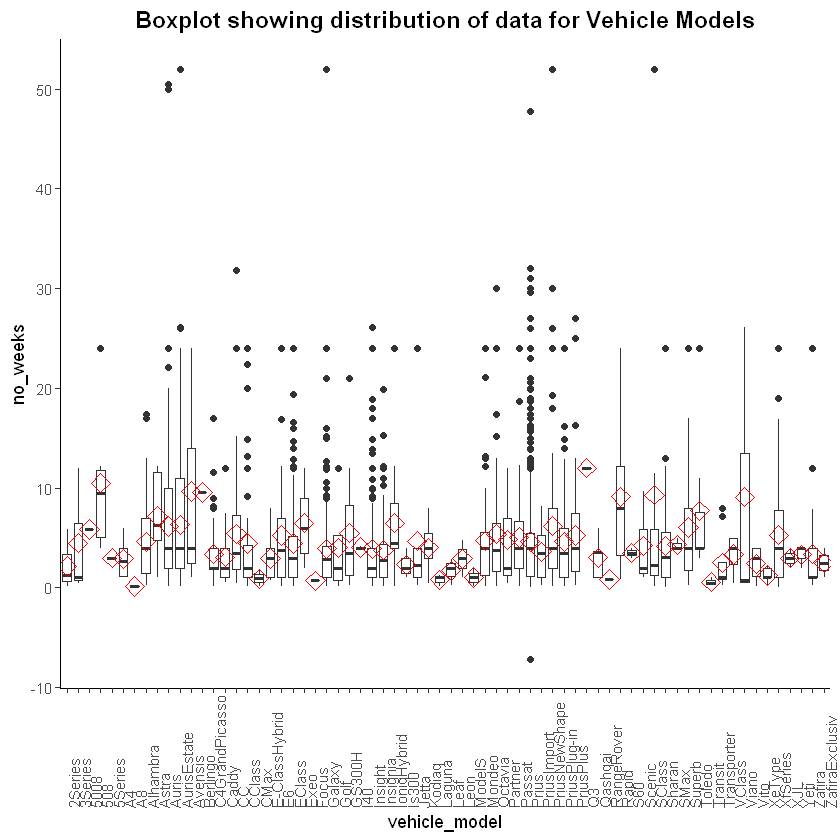

In [1094]:
# Looking at distribution of duration of bookings for all individual models 

# To see which model is expected to be booked for the longest duration, the distribution of the duration data was investigated i.e. the number of weeks. Using a boxplot to compare all the data, it can be clearly seen that mean values are not the best statistic to measure the average duration given the number of outliers in the data. Mean values are marked by the red diamonds in the figure below. Median values appear to be provide a better representation of the data. Peugeot 508 appears to be the vehicle model that will be booked for the longest duration on average.
# given median and variance.
#Negative number of weeks value indicated previously to be an error in the dataset. 
# Prius has highest number of outliers but also the dominant model, so perhaps to be expected.
p <- ggplot(bookings, aes_string(x="vehicle_model", y="no_weeks"))+ 
  geom_boxplot()
p + theme(plot.title = element_text(color="black", size=14, hjust=0.5,face="bold"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line = element_line(colour = "black"),
         axis.text.x = element_text(angle = 90, hjust = 0))  + ggtitle("Boxplot showing distribution of data for Vehicle Models")  + stat_summary(fun.y=mean, geom="point", shape=23, size=4,color="red")

In [1075]:
# Summaries bookings data using median number of weeks and frequency of bookings for each vehicle model and make 
df2 <- bookings %>% 
  group_by(vehicle_model, vehicle_make) %>%
  summarise(Frequency = n(), avg_weeks = median(no_weeks))

In [1076]:
# Mercedes Benz S Class on average has the longest duration of bookings however their frequency is low. In terms of 
#more frequently bought cars, Peugeut 508, Skoda Rapid and Vauxhall Astra can be expected to be booked out for the longest
#time. 
df2[order(-df2$avg_weeks,-df2$Frequency),] 

vehicle_model,vehicle_make,Frequency,avg_weeks
SClass,MercedesBenz,2,27.500000
Q3,Audi,1,12.000000
Berlingo,Citroen,1,9.571429
508,Peugeot,6,9.428571
Rapid,Skoda,30,8.000000
Astra,Vauxhall,16,6.214286
Exeo,Seat,4,6.000000
5008,Peugeot,1,5.857143
IoniqHybrid,Hyundai,18,4.500000
Prius,Toyota,2116,4.000000


In [1077]:
#Fibonnaci Sequence
fibonaci <- function(n) {
    if (n == 0){
         return(0)
    } else if (n==1) {
         return(1)
    } else {
         fibonaci(n-1) + fibonaci(n-2)
    }
}

In [1078]:
fibonaci(15)

[1] 610

In [1079]:
#Number of Live Bookings Function - based on completely untouched bookings data 
live_bookings <- function(date) {
    print(date)
    bookings$start_time <- as.Date(bookings$start_time, format= "%d/%m/%Y")
    bookings$end_time <- as.Date(bookings$end_time, format= "%d/%m/%Y")
    count <- count(subset(bookings, subset = (date >=start_time & date <= end_time)))
    print(paste("Number of live bookings:", count))
}

In [1080]:
live_bookings(date)

[1] "2018/01/12"
[1] "Number of live bookings: 133"


In [1081]:
haversine <- function(lat1,lon1, lat2,lon2) {
    #Degrees to Radians Conversion
    deg2rad <- function(degree) {
    return(degree*pi/180)
    }
    
    #Latitude/Longitude Coordinates of London
    lat1<- deg2rad(lat1)
    lon1 <- deg2rad(lon1)
    #Latitude/Longitude Coordinates of Paris
    lat2<- deg2rad(lat2)
    lon2 <- deg2rad(lon2)
    # Earth's Radius in km 
    earth_radius <- 6371
    # Find difference between longitude and latitudes of both points 
    delta_lat <- lat2-lat1
    delta_lon <- lon2-lon1
    
    a <- sin(delta_lat/2)^2 + cos(lat1)*cos(lat2)*sin(delta_lon/2)^2
    c <- 2*atan2(sqrt(a),sqrt(1-a))
    d <- earth_radius * c
    
    print(paste("The Distance between the two points is: ", signif(d,3),"km", sep=""))
}

In [1082]:
haversine(51.509865,-0.1257,48.8534,2.3488)

[1] "The Distance between the two points is: 344km"


## Bonus Question!- Data Visualisation

Using the cohorts data set, generate as closely as possible the following chart. Please use a plotting library such as ggplot (R) or seaborn (python). Alternatively, you may use excel. (Hint: The official Drover green has hex code #50FF7D)


In [1083]:
cohort = read.csv("cohort_data_data_analyst_test.csv")

In [1084]:
cohort$cohort_month <- months(as.Date(cohort$cohort_start, format= "%y/%m/%d"))

In [1085]:
cohort$cohort_month <- substr(cohort$cohort_month, 1, 3)
cohort$cohort_year <- substr(cohort$cohort_year, 3, 4)

In [1086]:
cohort$Cohort <- paste(cohort$cohort_month,"-",cohort$cohort_year,sep="")

In [1087]:
counts <- as.data.frame(table(cohort$cohort))
colnames(counts) <- c("cohort", "Frequency")

In [1088]:
data <- merge(counts,cohort)

In [1089]:
keeps <- c("Cohort", "Frequency")
data <- data[keeps]

In [1090]:
data <- unique(data)

In [1091]:
# lock in factor level order
data$Cohort <- factor(data$Cohort, levels = data$Cohort)

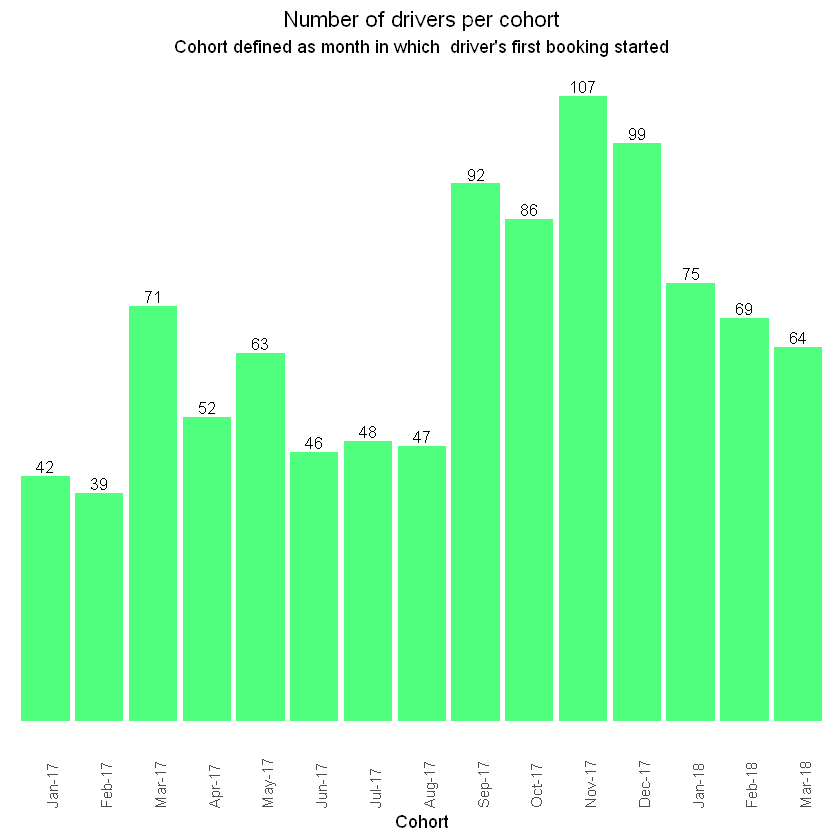

In [1092]:
# Cohort Plot
p<-ggplot(data=data, aes(x=Cohort, y=Frequency)) + geom_bar(stat="identity", fill="#50FF7D") +labs(x="Cohort", 
        title="Number of drivers per cohort",
              subtitle="Cohort defined as month in which  driver's first booking started")+ geom_text(aes(label=Frequency),vjust=-0.3, size=3.5) + 
theme_minimal()
p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         axis.text.x = element_text(angle = 90, hjust = 0),
         axis.text.y=element_blank(),
         plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust=0.5))  + ylab(NULL)